Connected to myenv (Python 3.12.6)

In [ ]:
# import the libraries as shown below
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [ ]:
BATCH_SIZE = 32
IMAGE_SIZE = 224
CHANNELS=3
EPOCHS=30

In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "Dataset2",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 13581 files belonging to 6 classes.


In [ ]:
class_names = dataset.class_names
class_names

['Black Gram_Anthracnose',
 'Black Gram_Healthy',
 'Black Gram_Leaf Crinckle',
 'Black Gram_Powdery Mildew',
 'Rice_Bacterial Blight',
 'Unknown']

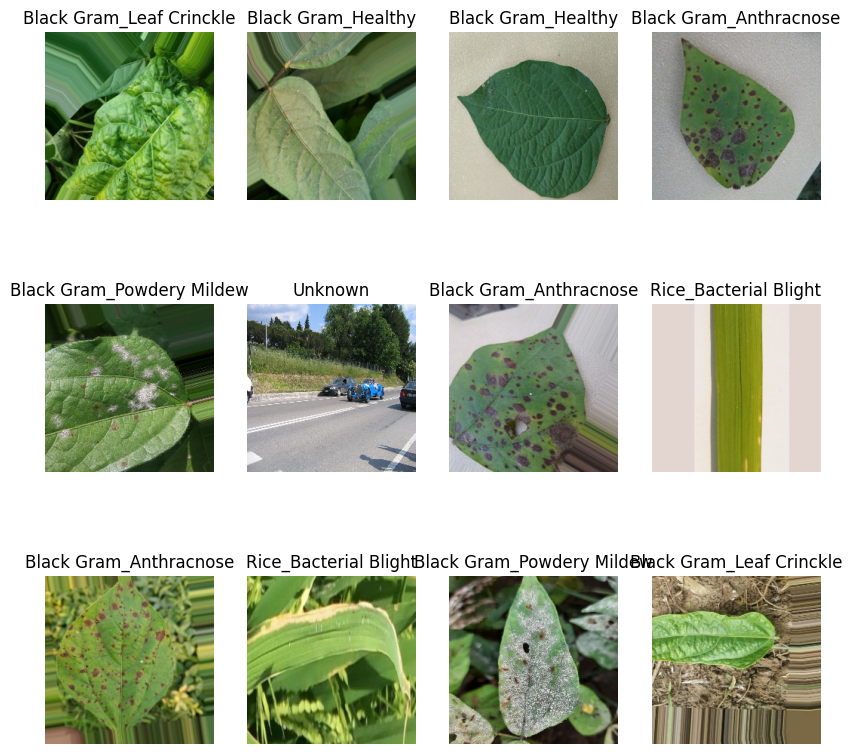

In [ ]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [ ]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(32, 224, 224, 3)
[3 4 4 5 0 1 2 0 2 3 5 4 5 1 0 1 4 0 5 3 2 3 4 5 0 2 3 4 4 2 3 2]


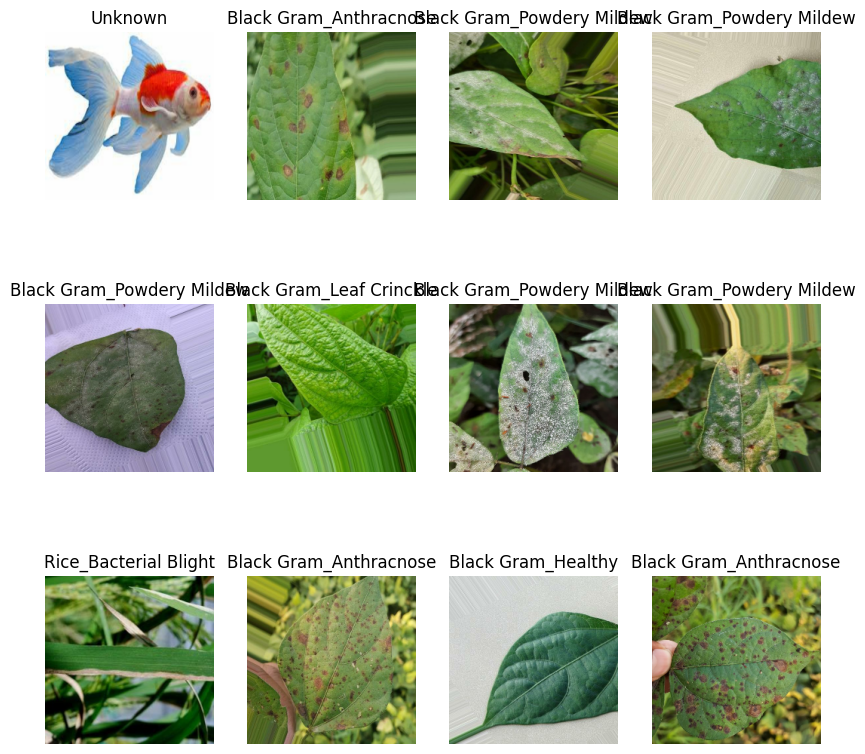

In [ ]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [ ]:
len(dataset)  # Total number of images (13581)

425

In [ ]:
train_size = 0.8
train_count = int(len(dataset) * train_size)
print(f"Training set size: {train_count}")

Training set size: 340


In [ ]:
train_ds = dataset.take(train_count)
print(f"Training dataset size: {len(train_ds)}")

Training dataset size: 340


In [ ]:
test_ds = dataset.skip(train_count)
print(f"Remaining dataset after training split: {len(test_ds)}")

Remaining dataset after training split: 85


In [ ]:
val_size = 0.1
val_count = int(len(dataset) * val_size)
print(f"Validation set size: {val_count}")

Validation set size: 42


In [ ]:
val_ds = test_ds.take(val_count)
print(f"Validation dataset size: {len(val_ds)}")

Validation dataset size: 42


In [ ]:
test_ds = test_ds.skip(val_count)
print(f"Test dataset size: {len(test_ds)}")

Test dataset size: 43


In [ ]:
def check_dataset_sizes(train_ds, val_ds, test_ds):
    train_size = len(train_ds)
    val_size = len(val_ds)
    test_size = len(test_ds)
    
    print(f"Train set size: {train_size} images")
    print(f"Validation set size: {val_size} images")
    print(f"Test set size: {test_size} images")

# Assuming train_ds, val_ds, test_ds are the TensorFlow Dataset objects
check_dataset_sizes(train_ds, val_ds, test_ds)

Train set size: 340 images
Validation set size: 42 images
Test set size: 43 images


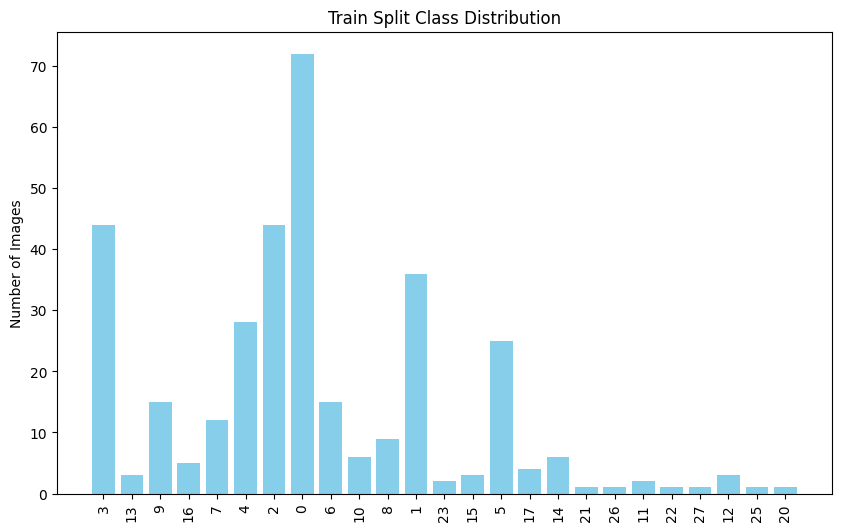

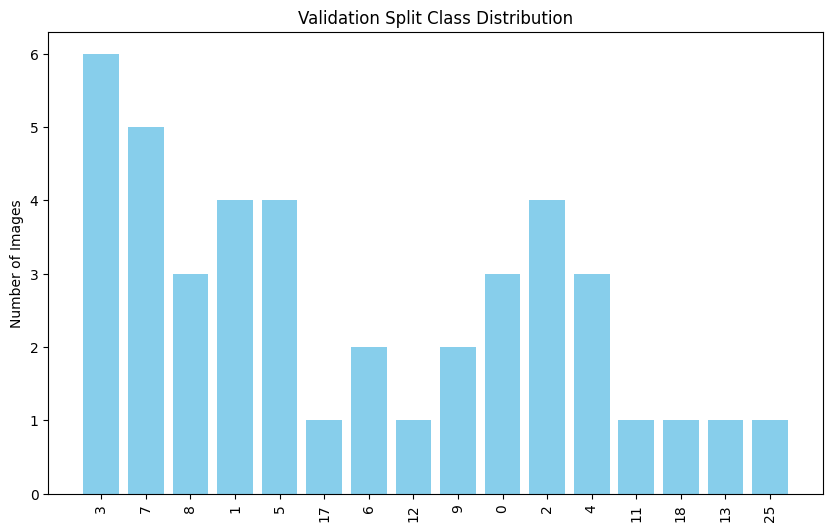

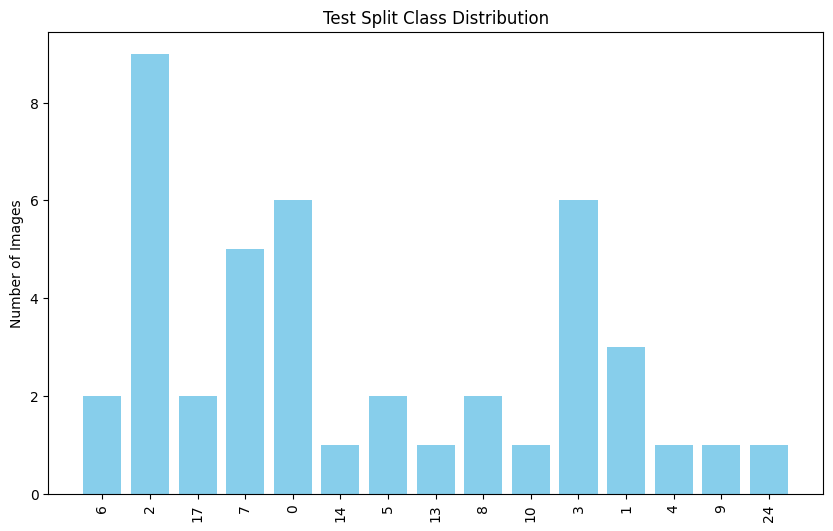

In [ ]:
import matplotlib.pyplot as plt

def plot_class_distribution(dataset, split_name):
    class_counts = {}
    
    for image, label in dataset:
        class_name = label.numpy().argmax()  # If using one-hot encoding for labels
        class_name = str(class_name)  # Convert to string to use as key
        class_counts[class_name] = class_counts.get(class_name, 0) + 1

    # Plot the class distribution
    classes = list(class_counts.keys())
    counts = list(class_counts.values())

    plt.figure(figsize=(10, 6))
    plt.bar(classes, counts, color='skyblue')
    plt.xticks(rotation=90)
    plt.title(f'{split_name} Split Class Distribution')
    plt.ylabel('Number of Images')
    plt.show()

# Assuming train_ds, val_ds, and test_ds are your splits
plot_class_distribution(train_ds, 'Train')
plot_class_distribution(val_ds, 'Validation')
plot_class_distribution(test_ds, 'Test')

In [ ]:
def check_no_overlap(train_ds, val_ds, test_ds):
    # Create sets to store image paths or indices
    train_images = set()
    val_images = set()
    test_images = set()

    # Add image paths/indices to the sets
    for image, label in train_ds:
        train_images.add(image.numpy().tobytes())  # or use image paths if available
    for image, label in val_ds:
        val_images.add(image.numpy().tobytes())  # or use image paths if available
    for image, label in test_ds:
        test_images.add(image.numpy().tobytes())  # or use image paths if available

    # Check for intersections (overlap)
    assert train_images.isdisjoint(val_images), "Overlap found between train and validation!"
    assert train_images.isdisjoint(test_images), "Overlap found between train and test!"
    assert val_images.isdisjoint(test_images), "Overlap found between validation and test!"

    print("No overlap between train, validation, and test datasets.")

# Assuming train_ds, val_ds, and test_ds are your splits
check_no_overlap(train_ds, val_ds, test_ds)

No overlap between train, validation, and test datasets.


Train Class Distribution:
Black Gram_Anthracnose: 1914 images
Black Gram_Healthy: 1821 images
Black Gram_Leaf Crinckle: 1917 images
Black Gram_Powdery Mildew: 1531 images
Rice_Bacterial Blight: 1844 images
Unknown: 1853 images

Validation Class Distribution:
Black Gram_Anthracnose: 234 images
Black Gram_Healthy: 234 images
Black Gram_Leaf Crinckle: 223 images
Black Gram_Powdery Mildew: 196 images
Rice_Bacterial Blight: 234 images
Unknown: 223 images

Test Class Distribution:
Black Gram_Anthracnose: 242 images
Black Gram_Healthy: 243 images
Black Gram_Leaf Crinckle: 218 images
Black Gram_Powdery Mildew: 185 images
Rice_Bacterial Blight: 224 images
Unknown: 245 images


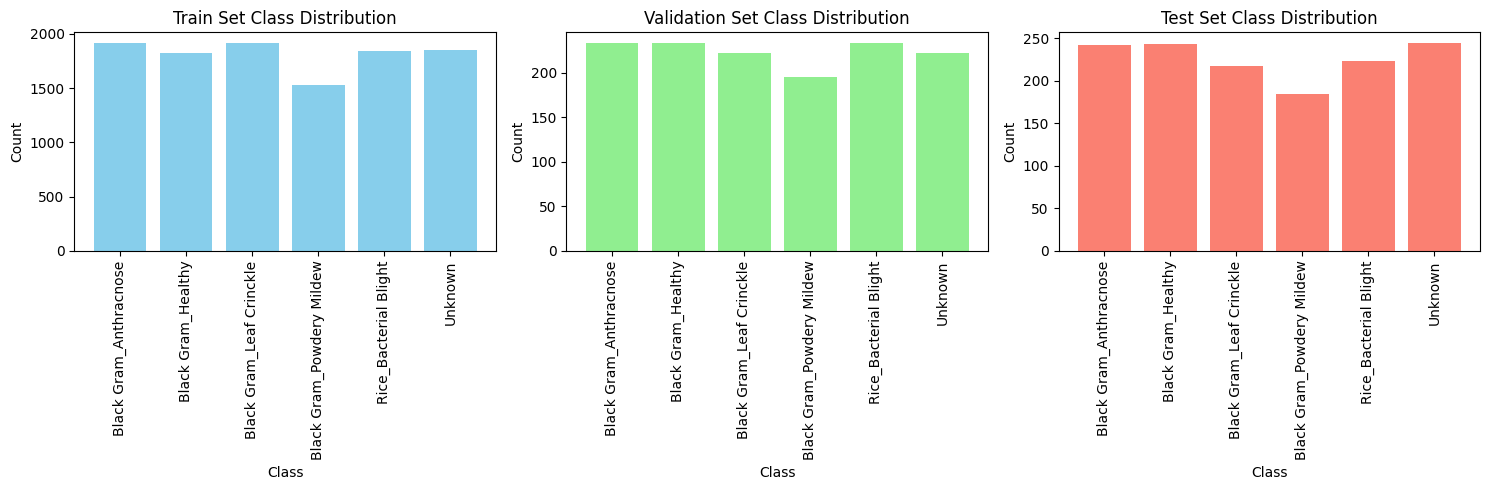

In [ ]:
import matplotlib.pyplot as plt

def count_class_distribution(dataset, class_names):
    # Dictionary to store the count of images per class
    class_count = {class_name: 0 for class_name in class_names}
    
    # Iterate through the dataset and count images per class
    for image_batch, label_batch in dataset:
        labels = label_batch.numpy()
        for label in labels:
            class_name = class_names[label]  # Get class name from label index
            class_count[class_name] += 1
            
    return class_count

# Count the number of images in each split (train, validation, test)
train_class_distribution = count_class_distribution(train_ds, class_names)
val_class_distribution = count_class_distribution(val_ds, class_names)
test_class_distribution = count_class_distribution(test_ds, class_names)

# Print class distribution for each split
print("Train Class Distribution:")
for class_name, count in train_class_distribution.items():
    print(f"{class_name}: {count} images")
    
print("\nValidation Class Distribution:")
for class_name, count in val_class_distribution.items():
    print(f"{class_name}: {count} images")
    
print("\nTest Class Distribution:")
for class_name, count in test_class_distribution.items():
    print(f"{class_name}: {count} images")

# Plot the class distributions
def plot_class_distribution(train_dist, val_dist, test_dist):
    # Create subplots
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    # Train distribution
    axes[0].bar(train_dist.keys(), train_dist.values(), color='skyblue')
    axes[0].set_title('Train Set Class Distribution')
    axes[0].set_xlabel('Class')
    axes[0].set_ylabel('Count')
    axes[0].tick_params(axis='x', rotation=90)

    # Validation distribution
    axes[1].bar(val_dist.keys(), val_dist.values(), color='lightgreen')
    axes[1].set_title('Validation Set Class Distribution')
    axes[1].set_xlabel('Class')
    axes[1].set_ylabel('Count')
    axes[1].tick_params(axis='x', rotation=90)

    # Test distribution
    axes[2].bar(test_dist.keys(), test_dist.values(), color='salmon')
    axes[2].set_title('Test Set Class Distribution')
    axes[2].set_xlabel('Class')
    axes[2].set_ylabel('Count')
    axes[2].tick_params(axis='x', rotation=90)

    plt.tight_layout()
    plt.show()

# Plot the class distribution for each set
plot_class_distribution(train_class_distribution, val_class_distribution, test_class_distribution)

In [ ]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
from tensorflow.keras import layers

resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),  # Directly use layers.Resizing
    layers.Rescaling(1./255)                 # Directly use layers.Rescaling
])

In [ ]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)  # Exclude BATCH_SIZE here
n_classes = 6

model = models.Sequential([
    layers.Input(shape=input_shape),             # Add Input layer to define input shape
    resize_and_rescale,                          # Include resize and rescale layer
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

#to explicitly build the model (although not necessary in this case)
model.build(input_shape=(None, *input_shape))  # Use None for batch size (dynamic)

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 10, 10, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 171,654 (670.52 KB)

 Trainable params: 171,654 (670.52 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model

history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=30,
    callbacks=[early_stopping]
)

Epoch 1/30
340/340 ━━━━━━━━━━━━━━━━━━━━ 258s 716ms/step - accuracy: 0.3366 - loss: 1.5049 - val_accuracy: 0.5662 - val_loss: 1.0934
Epoch 2/30
340/340 ━━━━━━━━━━━━━━━━━━━━ 233s 684ms/step - accuracy: 0.6075 - loss: 0.9948 - val_accuracy: 0.6689 - val_loss: 0.8355
Epoch 3/30
340/340 ━━━━━━━━━━━━━━━━━━━━ 232s 681ms/step - accuracy: 0.7047 - loss: 0.7578 - val_accuracy: 0.8095 - val_loss: 0.5505
Epoch 4/30
340/340 ━━━━━━━━━━━━━━━━━━━━ 232s 681ms/step - accuracy: 0.7963 - loss: 0.5362 - val_accuracy: 0.8542 - val_loss: 0.4263
Epoch 5/30
340/340 ━━━━━━━━━━━━━━━━━━━━ 229s 674ms/step - accuracy: 0.8627 - loss: 0.3775 - val_accuracy: 0.8943 - val_loss: 0.3325
Epoch 6/30
340/340 ━━━━━━━━━━━━━━━━━━━━ 228s 672ms/step - accuracy: 0.8975 - loss: 0.2976 - val_accuracy: 0.9137 - val_loss: 0.2727
Epoch 7/30
340/340 ━━━━━━━━━━━━━━━━━━━━ 232s 684ms/step - accuracy: 0.9224 - loss: 0.2204 - val_accuracy: 0.9427 - val_loss: 0.1803
Epoch 8/30
340/340 ━━━━━━━━━━━━━━━━━━━━ 232s 682ms/step - accuracy: 0.9406 -

In [ ]:
scores = model.evaluate(test_ds)

43/43 ━━━━━━━━━━━━━━━━━━━━ 17s 136ms/step - accuracy: 0.9834 - loss: 0.0552


In [ ]:
scores = model.evaluate(val_ds)

42/42 ━━━━━━━━━━━━━━━━━━━━ 6s 133ms/step - accuracy: 0.9887 - loss: 0.0410


In [ ]:
scores = model.evaluate(train_ds)

340/340 ━━━━━━━━━━━━━━━━━━━━ 52s 154ms/step - accuracy: 0.9976 - loss: 0.0099


In [ ]:
history

In [ ]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 340}

In [ ]:
type(history.history['loss'])

list

In [ ]:
type(history.history['loss'])

list

In [ ]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [ ]:
type(history.history['loss'])

list

In [ ]:
len(history.history['loss'])

29

In [ ]:
history.history['loss'][:5] # show loss for first 5 epochs

[1.3171662092208862,
 0.9293124079704285,
 0.7014517784118652,
 0.5025309324264526,
 0.35849714279174805]

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

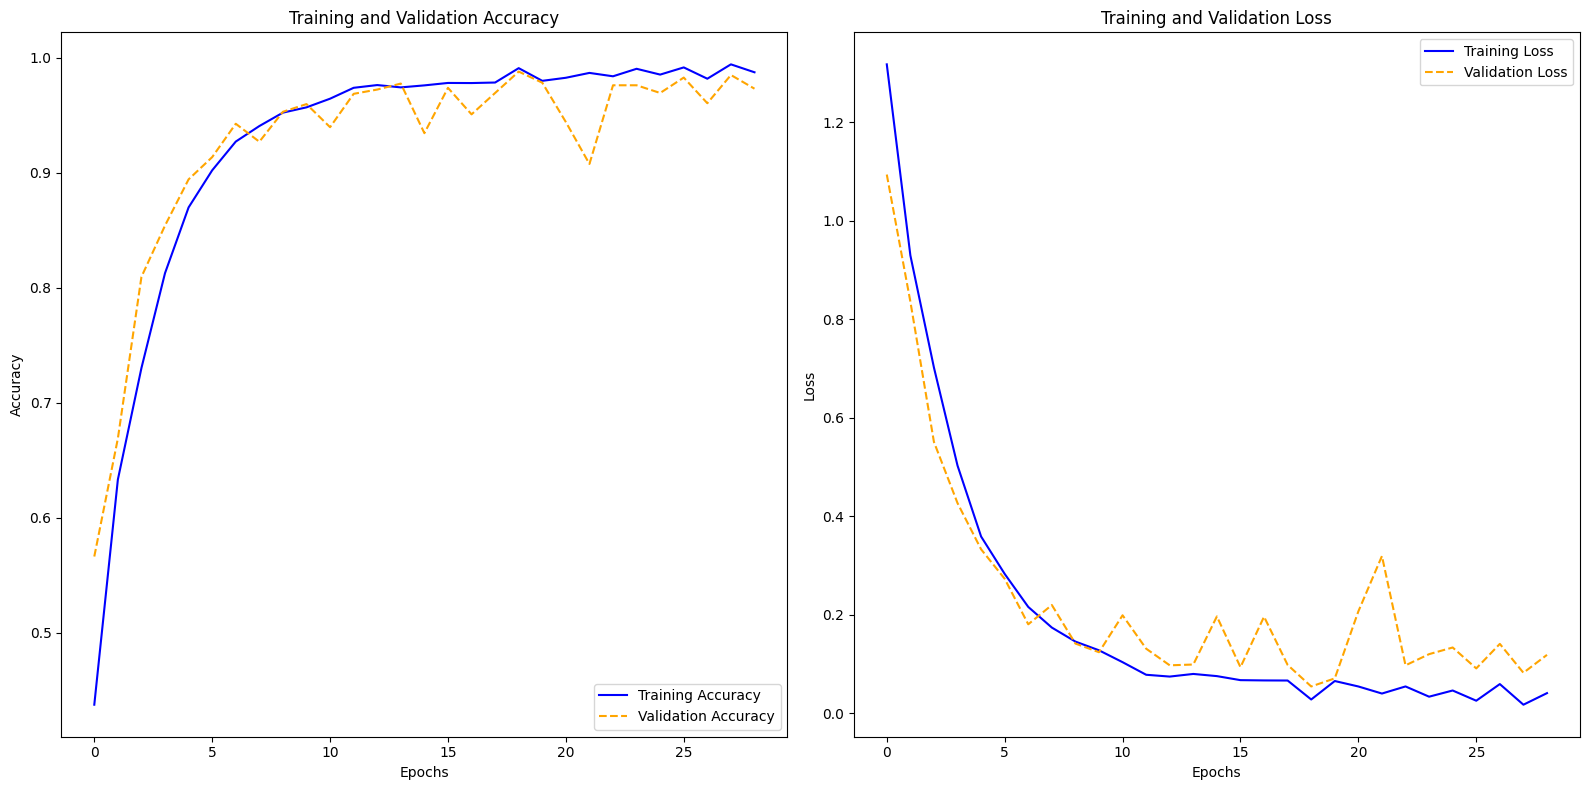

In [ ]:
# Ensure the lengths of x and y match for plotting
completed_epochs = len(acc)  # Use the actual number of completed epochs

plt.figure(figsize=(16, 8))

# Plot Training and Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(range(completed_epochs), acc, label='Training Accuracy', color='blue', linestyle='-')
plt.plot(range(completed_epochs), val_acc, label='Validation Accuracy', color='orange', linestyle='--')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Plot Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(range(completed_epochs), loss, label='Training Loss', color='blue', linestyle='-')
plt.plot(range(completed_epochs), val_loss, label='Validation Loss', color='orange', linestyle='--')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.tight_layout()
plt.show()

first image to predict
actual label: Black Gram_Anthracnose
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
predicted label: Black Gram_Anthracnose


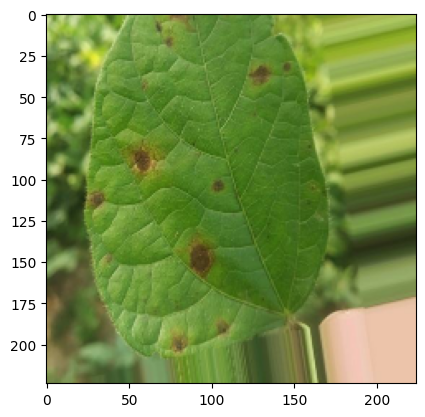

In [ ]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


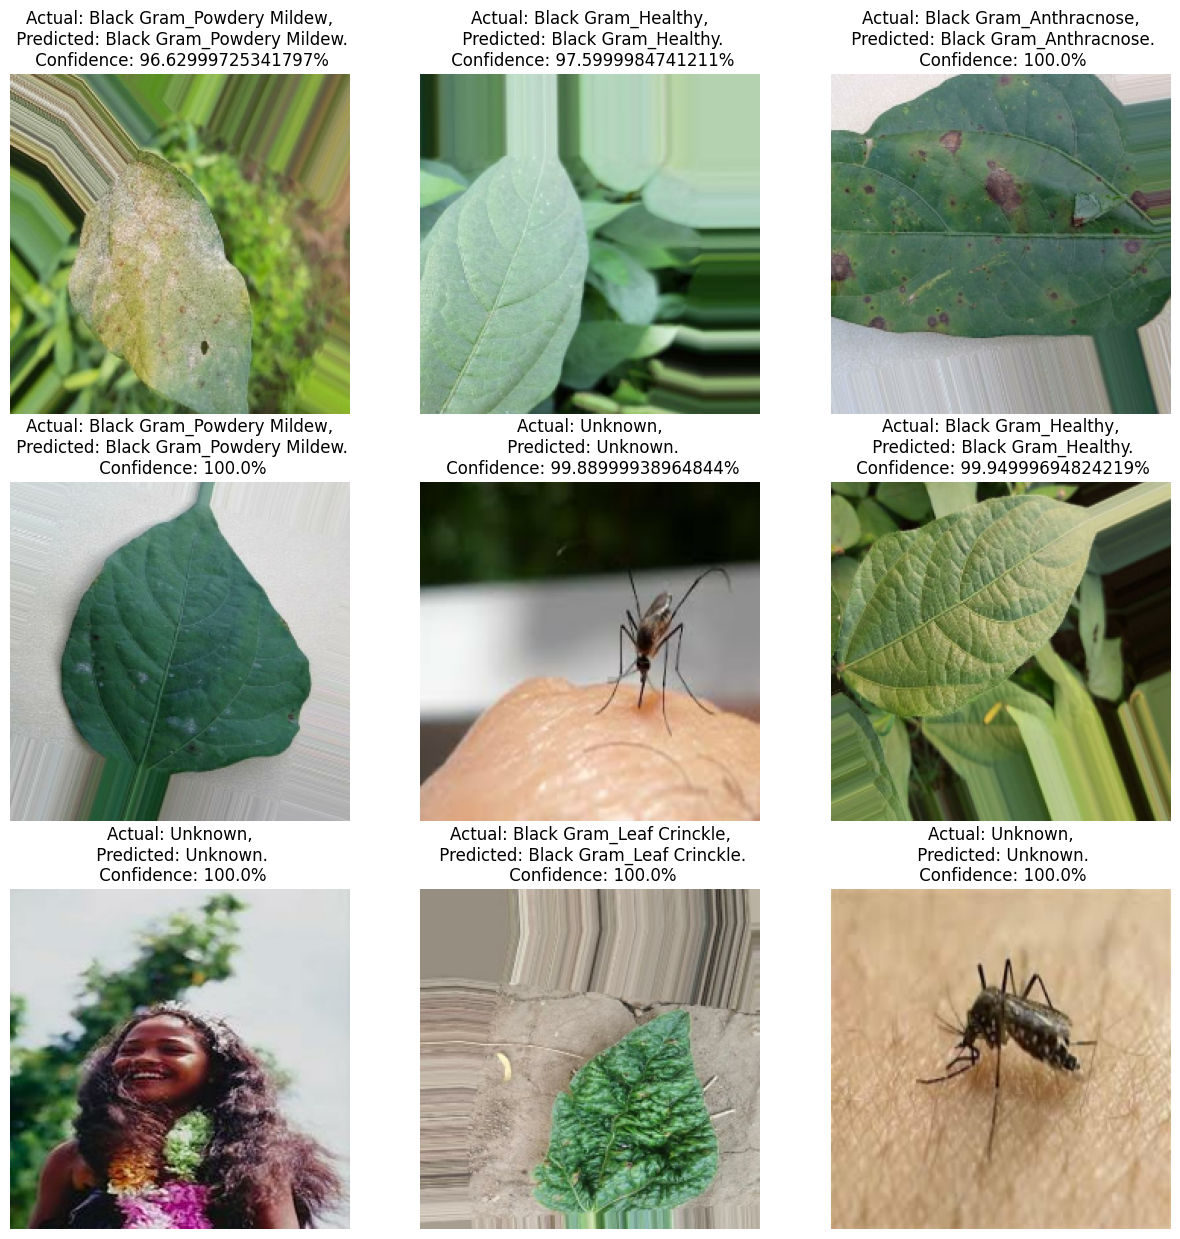

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        plt.axis("off")

In [ ]:
TRAINED_MODEL_DIR = "Trained Models"

In [ ]:
# Save the model in .h5 format
import os
os.makedirs(TRAINED_MODEL_DIR, exist_ok=True)
model_version = max([int(i) for i in os.listdir(TRAINED_MODEL_DIR) if i.isdigit()]+[0]) + 1
model_path = os.path.join(TRAINED_MODEL_DIR, f"model_v{model_version}.h5")
model.save(model_path)

In [ ]:
# Save the model in .keras format
import os

# Directory where the trained models are saved
os.makedirs(TRAINED_MODEL_DIR, exist_ok=True)

# Determine the next version number based on existing model versions in the directory
model_version = max([int(i) for i in os.listdir(TRAINED_MODEL_DIR) if i.isdigit()] + [0]) + 1

# Define the new model path with the .keras extension
model_path = os.path.join(TRAINED_MODEL_DIR, f"model_v{model_version}.keras")

# Save the model in the new .keras format
model.save(model_path)

In [ ]:
# Checking the folder 
import os

# Directory where the trained models are saved
os.makedirs(TRAINED_MODEL_DIR, exist_ok=True)

# Check the contents of the directory to verify existing model files
print(f"Existing files: {os.listdir(TRAINED_MODEL_DIR)}")

# Determine the next version number based on existing model versions in the directory
model_version = max([int(i) for i in os.listdir(TRAINED_MODEL_DIR) if i.isdigit()] + [0]) + 1
print(f"Saving model version: {model_version}")

# Define the new model path with the .keras extension
model_path = os.path.join(TRAINED_MODEL_DIR, f"model_v{model_version}.keras")
print(f"Saving model to: {model_path}")

# Save the model in the new .keras format
try:
    model.save(model_path)
    print(f"Model saved successfully to: {model_path}")
except Exception as e:
    print(f"Error saving model: {e}")

Existing files: ['model_v1.h5', 'model_v1.keras']
Saving model version: 1
Saving model to: Trained Models\model_v1.keras
Model saved successfully to: Trained Models\model_v1.keras


In [ ]:
# Save the model in main folder in .h5 format

example_path="Model_2.h5"
model.save(example_path)

print(f"Model saved successfully to: {model_path}")
print(f"Model saved successfully to: {example_path}")

Model saved successfully to: Trained Models\model_v1.keras
Model saved successfully to: Model_2.h5


In [ ]:
# Save the model in the main folder in .keras format
example_path_keras = "Model_2.keras"
model.save(example_path_keras)
print(f"Model saved successfully to: {example_path_keras}")

Model saved successfully to: Model_2.keras
